# Laboratory Report

**Group 4AE-SE TP1/2**

Members:
- Andrea Pérez Fernández 
- Martin Cheliz Calvo
- Léa Scheer

# LAB 1 : Artificial Neural Networks for regression

## Exercice

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime #measure training time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [2]:
#Importing the dataset
dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')

#Dividing the input and outputs
X = dataset[:, :-1]
y = dataset[:, -1]

#dividing between training and test data
x_train, x_test, y_train, y_test = train_test_split(X, y,random_state=0, test_size = 0.20)

#Scaling the datasets
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [3]:
#Neural Network training
mlp= MLPRegressor(hidden_layer_sizes=(5), activation='logistic', 
                  solver='adam', #solver
                  alpha=0.01,# L2 penalty (regularization term) parameter
                  batch_size='auto', #Size of minibatches for stochastic optimizers.
                  learning_rate='adaptive', #Learning rate schedule for weight updates
                  learning_rate_init=0.01, #The initial learning rate used
                  max_iter=1000, #Maximum number of iterations
                  tol=1e-4, #When the loss or score is not improving by at least tol for n_iter_no_change
                  verbose=False, # To Print progress messages during learning step
                  warm_start=False, #When set to True, reuse the solution of the previous call to fit as
                  early_stopping=True, #Whether to use early stopping to terminate training when
                  validation_fraction=0.1, #The proportion of training data to set aside as validation se
                  n_iter_no_change=50) #Maximum number of epochs to not meet tol improvement.)
#had to change tolerance for convergence of the algorithm. 
start_time = datetime.now()
mlp.fit(x_train, y_train)
end_time = datetime.now()

#training score
score_train = mlp.score(x_train, y_train)
print("Training score : {0:.3f}".format(score_train))
#test score
score_test = mlp.score(x_test, y_test)
print("Test score : ", score_test)
#training time
print("Training Time : ", (end_time-start_time))

#predicted vs target values
y_predict = mlp.predict(x_test)
y_predict_train = mlp.predict(x_train)

Training score : 0.868
Test score :  0.9121832548123231
Training Time :  0:00:00.376788


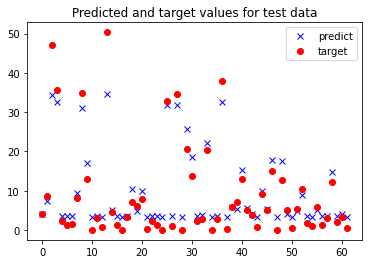

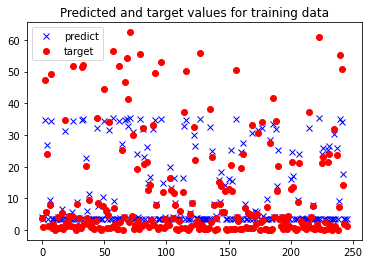

In [4]:
plt.plot(y_predict ,'bx', label="predict")
plt.plot(y_test, 'ro', label="target")
plt.title("Predicted and target values for test data")
plt.legend()
plt.show()
plt.close()
plt.plot(y_predict_train ,'bx', label="predict")
plt.plot(y_train, 'ro', label="target")
plt.title("Predicted and target values for training data")
plt.legend()
plt.show()
plt.close()

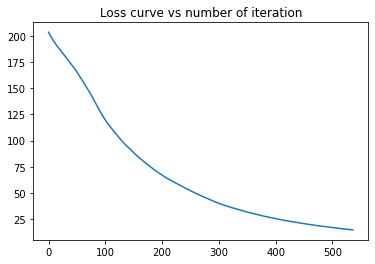

In [5]:
#loss curve
loss_curve = mlp.loss_curve_
plt.plot(loss_curve)
plt.title("Loss curve vs number of iteration")
plt.show()
plt.close()

**Calcul des performances en utilisant "relu"**

C:\Users\andre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


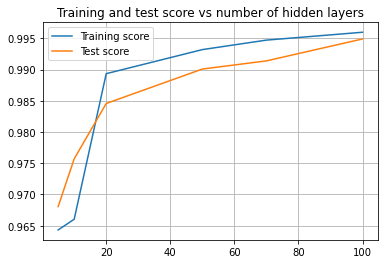

In [6]:
#Score vs number of neurons
neurons = (5, 10, 20, 50, 70, 100)
training_score = np.zeros(len(neurons))
test_score = np.zeros(len(neurons))
run_time = (np.zeros(len(neurons)))
for i in range(0,len(neurons)):
    mlp= MLPRegressor(hidden_layer_sizes=(neurons[i]), activation='logistic',
                      solver='adam', #solver
                      alpha=0.01,# L2 penalty (regularization term) parameter
                      batch_size='auto', #Size of minibatches for stochastic optimizers.
                      learning_rate='adaptive', #Learning rate schedule for weight updates
                      learning_rate_init=0.01, #The initial learning rate used
                      max_iter=1000, #Maximum number of iterations
                      tol=1e-4, #When the loss or score is not improving by at least tol for n_iter_no_change
                      verbose=False, # To Print progress messages during learning step
                      warm_start=False, #When set to True, reuse the solution of the previous call to fit as
                      early_stopping=True, #Whether to use early stopping to terminate training when
                      validation_fraction=0.1, #The proportion of training data to set aside as validation se
                      n_iter_no_change=50) #Maximum number of epochs to not meet tol improvement.))
    start_time = datetime.now()
    mlp.fit(x_train, y_train);
    end_time = datetime.now()
    run_time[i] = (end_time-start_time).microseconds
    training_score[i] = mlp.score(x_train, y_train);
    test_score[i] = mlp.score(x_test, y_test);
    
plt.plot(neurons, training_score, label="Training score")
plt.plot(neurons, test_score, label="Test score")
plt.legend()
plt.grid()
plt.title("Training and test score vs number of hidden layers");
plt.show()
plt.close()


À partir de 20 neurones la précsion n'augmente pas de forme significative par rapport au nombre de neurones. Dans les deux cas, pour le test et le training la précision reste élevée. Nous n'observons pas le phénomène de overfitting.

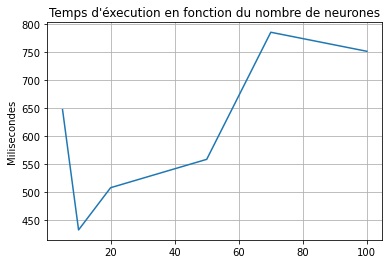

In [7]:
plt.plot(neurons, run_time/1000)
plt.ylabel("Milisecondes")
plt.title("Temps d'éxecution en fonction du nombre de neurones")
plt.grid()

Plus il y a de neurones plus le temps d'éxécution augmente. Nous observons désormais un temops d'éxécution très élevé pour un regresseur à 5 neurones. Il est possible que ce soit dû à la non convergence de l'algorithme qui va alors va réaliser un maximum d'itération pour converger. 

**Calcul des performances en utilisant "relu"**

In [8]:
neurons = (5, 10, 20, 50, 70, 100)
training_score_relu = np.zeros(len(neurons))
test_score_relu = np.zeros(len(neurons))

for i in range(0,len(neurons)):
    mlp= MLPRegressor(hidden_layer_sizes=(neurons[i]), activation='relu',
                      solver='adam', #solver
                      alpha=0.01,# L2 penalty (regularization term) parameter
                      batch_size='auto', #Size of minibatches for stochastic optimizers.
                      learning_rate='adaptive', #Learning rate schedule for weight updates
                      learning_rate_init=0.01, #The initial learning rate used
                      max_iter=1000, #Maximum number of iterations
                      tol=1e-4, #When the loss or score is not improving by at least tol for n_iter_no_change
                      verbose=False, # To Print progress messages during learning step
                      warm_start=False, #When set to True, reuse the solution of the previous call to fit as
                      early_stopping=True, #Whether to use early stopping to terminate training when
                      validation_fraction=0.1, #The proportion of training data to set aside as validation se
                      n_iter_no_change=50) #Maximum number of epochs to not meet tol improvement.))
    mlp.fit(x_train, y_train);
    training_score_relu[i] = mlp.score(x_train, y_train);
    test_score_relu[i] = mlp.score(x_test, y_test);
    


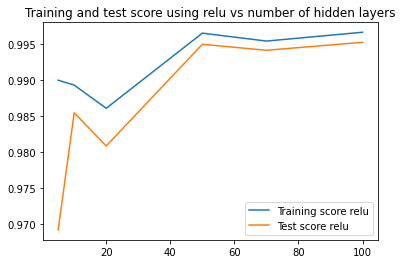

Text(0.5, 1.0, 'Runtime in miliseconds vs number of hidden layers')

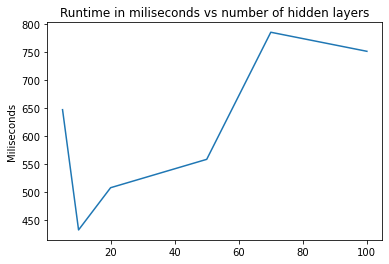

In [9]:
plt.plot(neurons, training_score_relu, label="Training score relu")
plt.plot(neurons, test_score_relu, label="Test score relu")
plt.legend()
plt.title("Training and test score using relu vs number of hidden layers")
plt.show()
plt.close()

plt.plot(neurons, run_time/1000)
plt.ylabel("Miliseconds")
plt.title("Runtime in miliseconds vs number of hidden layers")

Nous observons des courbes à comportements similaires mais avec une précision plus élévée et atteinte plus vite. 

## Exercise 2


C:\Users\andre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\andre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


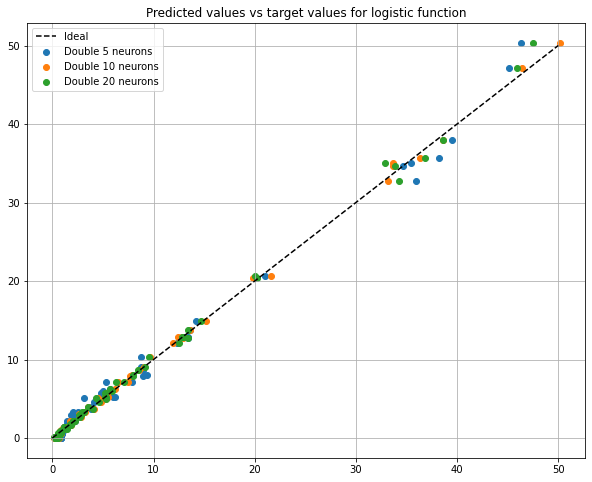

In [10]:
neurons = ((5,5), (10,10), (20,20))
training_score = np.zeros(len(neurons))
test_score = np.zeros(len(neurons))
fig = plt.figure(1, figsize=(10, 8))
run_time2 = np.zeros(len(neurons))

for i in range(0,len(neurons)):
    mlp= MLPRegressor(hidden_layer_sizes=(neurons[i]), activation='logistic',
                      solver='adam', #solver
                      alpha=0.01,# L2 penalty (regularization term) parameter
                      batch_size='auto', #Size of minibatches for stochastic optimizers.
                      learning_rate='adaptive', #Learning rate schedule for weight updates
                      learning_rate_init=0.01, #The initial learning rate used
                      max_iter=1000, #Maximum number of iterations
                      tol=1e-4, #When the loss or score is not improving by at least tol for n_iter_no_change
                      verbose=False, # To Print progress messages during learning step
                      warm_start=False, #When set to True, reuse the solution of the previous call to fit as
                      early_stopping=True, #Whether to use early stopping to terminate training when
                      validation_fraction=0.1, #The proportion of training data to set aside as validation se
                      n_iter_no_change=50) #Maximum number of epochs to not meet tol improvement.))
    start_time = datetime.now()
    mlp.fit(x_train, y_train);
    end_time = datetime.now()
    run_time2[i] = (end_time-start_time).microseconds
    training_score[i] = mlp.score(x_train, y_train);
    test_score[i] = mlp.score(x_test, y_test);
    y_predict = mlp.predict(x_test)
    plt.scatter(y_predict, y_test, label="Double {0:.0f} neurons".format(neurons[i][1]))
    plt.legend()
    plt.grid()

idealx = [0, 50]
idealy = [0, 50]
plt.title("Predicted values vs target values for logistic function")
plt.plot(idealx, idealy, color='black', linestyle='dashed', label="Ideal")
plt.legend()
plt.show()
plt.close()

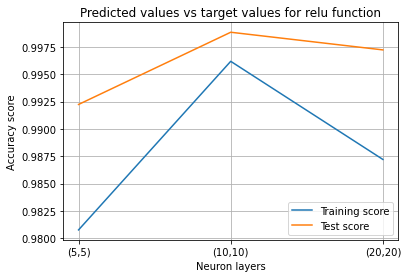

In [11]:
plt.plot(training_score, label="Training score")
plt.plot(test_score, label="Test score")
positions = (0, 1, 2)
plt.title("Predicted values vs target values for relu function")
labels = ("(5,5)", "(10,10)", "(20,20)")
plt.xlabel("Neuron layers")
plt.ylabel("Accuracy score")
plt.xticks(positions, labels);
plt.legend()
plt.grid()

Nous observons une meilleure performance pour un double couche de neurones (10, 10). 

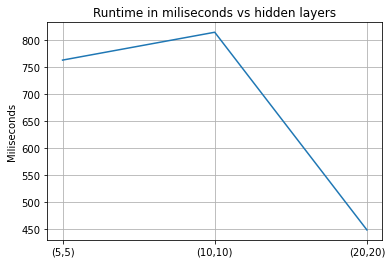

In [12]:
plt.plot(run_time2/1000)
plt.ylabel("Miliseconds")
plt.title("Runtime in miliseconds vs hidden layers")
positions = (0, 1, 2)
labels = ("(5,5)", "(10,10)", "(20,20)")
plt.xticks(positions, labels);
plt.grid()

Le temps d'éxécution est aussi le plus élevé pour une double couche de neurones (10, 10). 

# LAB 2 : Classification with neural networks

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime #measure training time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier 
from sklearn.datasets import fetch_openml
from sklearn.metrics import precision_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [14]:
# fetch dataset from openml (might take some time)
mnist = fetch_openml('mnist_784', as_frame=False)

# Selection of 5000 images among the 70000 available.
sample = np.random.randint(70000, size=5000)
data = mnist.data[sample]
target = mnist.target[sample]

In [ ]:
#Questions de preparation
print(mnist) # toutes les infos sur le dataset
print (mnist.data) #array de data
print (mnist.target) #array des target values
len(mnist.data) #longueur 
help(len)    #Aide fonction
print (mnist.data.shape) # print taille de la dataset sans target (X)
print (mnist.target.shape)  # print taille de la dataset pour target (Y)
mnist.data[0]
mnist.data[0][1]
mnist.data[:,1]
mnist.data[:100]

#Reconstruction de l'image
images = mnist.data.reshape((-1, 28, 28)) # à partir des 784 pixel données 
#                                           on reconstruit un tableau
plt.imshow(images[0],cmap=plt.cm.gray_r,interpolation="nearest")#à partir du tableau -> image
plt.show()

In [16]:
#Spliting dataset
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state=0, test_size = 0.20)

In [17]:
#Artificial Neural Network classifier
mlp= MLPClassifier(hidden_layer_sizes=(50), activation='logistic', 
                  solver='adam', #solver
                  alpha=0.01,# L2 penalty (regularization term) parameter
                  batch_size='auto', #Size of minibatches for stochastic optimizers.
                  max_iter=1000, #Maximum number of iterations
                  tol=1e-4, #When the loss or score is not improving by at least tol for n_iter_no_change
                  verbose=False, # To Print progress messages during learning step
                  warm_start=False, #When set to True, reuse the solution of the previous call to fit as
                  early_stopping=True, #Whether to use early stopping to terminate training when
                  validation_fraction=0.1, #The proportion of training data to set aside as validation se
                  n_iter_no_change=50) #Maximum number of epochs to not meet tol improvement.)
#had to change tolerance for convergence of the algorithm. 

#training
start_time = datetime.now()
mlp.fit(x_train, y_train)
end_time = datetime.now()

#training time
print("Training Time: ", (end_time-start_time))

#Score calculation
score_train = mlp.score(x_train, y_train)
score_test = mlp.score(x_test, y_test)
print("Score for training: {0:.3f}".format(score_train))
print("Score for test: {0:.3f}".format(score_test))

Training Time:  0:00:05.437211
Score for training: 0.985
Score for test: 0.925


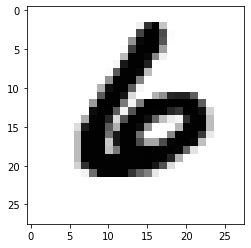

Class of image 4:  6
Predicted class of image 4:  6


In [18]:
#Prediction
y_predict = mlp.predict(x_test)
y_predict_train = mlp.predict(x_train)

#Reconstruction
images = x_test.reshape((-1, 28, 28)) # à partir des 784 pixel données 
#                                           on reconstruit un tableau
plt.imshow(images[4],cmap=plt.cm.gray_r,interpolation="nearest")#à partir du tableau -> image
plt.show()
print("Class of image 4: ", y_test[4])
print("Predicted class of image 4: ", y_predict[4])

Precision Score 0.925
Accuracy Score 0.925


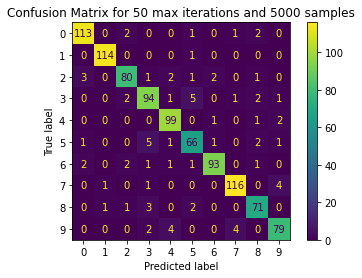

In [19]:
#precision score
pr = precision_score(y_test, y_predict, average='micro')
print("Precision Score {0:.3f}".format(pr))

#accuracy score
ac = accuracy_score(y_test,y_predict)
print("Accuracy Score {0:.3f}".format(ac))

#confusion matrix
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_);
disp.plot();
plt.title("Confusion Matrix for 50 max iterations and 5000 samples");

Globalement le nombre de fausse prédictions est faible, le classificateur est très performant. 

In [20]:
print("*********5000 Samples***************")
for i in (10, 50, 300):
    print("Model with Max iterations = ", i)
    #Artificial Neural Network classifier
    mlp= MLPClassifier(hidden_layer_sizes=(50), activation='logistic', 
                      solver='adam', #solver
                      alpha=0.01,# L2 penalty (regularization term) parameter
                      batch_size='auto', #Size of minibatches for stochastic optimizers.
                      max_iter=i, #Maximum number of iterations
                      tol=1e-4, #When the loss or score is not improving by at least tol for n_iter_no_change
                      verbose=False, # To Print progress messages during learning step
                      warm_start=False, #When set to True, reuse the solution of the previous call to fit as
                      early_stopping=True, #Whether to use early stopping to terminate training when
                      validation_fraction=0.1, #The proportion of training data to set aside as validation se
                      n_iter_no_change=50); #Maximum number of epochs to not meet tol improvement.)
    #had to change tolerance for convergence of the algorithm. 
    
    #training
    start_time = datetime.now()
    mlp.fit(x_train, y_train)
    end_time = datetime.now()
    
    #training time
    print("Training Time: ", (end_time-start_time))
    
    #Score calculation
    score_train = mlp.score(x_train, y_train)
    score_test = mlp.score(x_test, y_test)
    print("Score for training: {0:.3f}".format(score_train))
    print("Score for test: {0:.3f}".format(score_test))
    
    #Prediction
    y_predict = mlp.predict(x_test)
    y_predict_train = mlp.predict(x_train)
    
    #precision score
    precision = precision_score(y_test, y_predict, average='micro')
    print("Precision score: {0:.3f}".format(precision))
    
    #accuracy score
    accuracy = accuracy_score(y_test,y_predict)
    print("Accuracy score: {0:.3f}\n".format(accuracy))

*********5000 Samples***************
Model with Max iterations =  10


C:\Users\andre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Time:  0:00:00.327294
Score for training: 0.881
Score for test: 0.865
Precision score: 0.865
Accuracy score: 0.865

Model with Max iterations =  50


C:\Users\andre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Time:  0:00:01.438787
Score for training: 0.955
Score for test: 0.916
Precision score: 0.916
Accuracy score: 0.916

Model with Max iterations =  300
Training Time:  0:00:02.921443
Score for training: 0.961
Score for test: 0.915
Precision score: 0.915
Accuracy score: 0.915



**Entrainement avec 20 000 échantillons**

************20000**********
Training Time:  0:00:16.264318
Score for training: 0.963
Score for test: 0.934
Precision score: 0.934
Accuracy score: 0.934



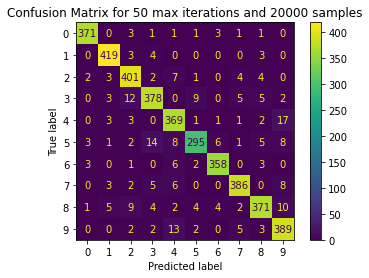

In [21]:
print("************20000**********")   
sample = np.random.randint(70000, size=20000)
data = mnist.data[sample]
target = mnist.target[sample]

#Spliting dataset
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state=0, test_size = 0.20)

#Artificial Neural Network classifier
mlp= MLPClassifier(hidden_layer_sizes=(50), activation='logistic', 
                  solver='adam', #solver
                  alpha=0.01,# L2 penalty (regularization term) parameter
                  batch_size='auto', #Size of minibatches for stochastic optimizers.
                  max_iter=i, #Maximum number of iterations
                  tol=1e-4, #When the loss or score is not improving by at least tol for n_iter_no_change
                  verbose=False, # To Print progress messages during learning step
                  warm_start=False, #When set to True, reuse the solution of the previous call to fit as
                  early_stopping=True, #Whether to use early stopping to terminate training when
                  validation_fraction=0.1, #The proportion of training data to set aside as validation se
                  n_iter_no_change=50) #Maximum number of epochs to not meet tol improvement.)
#had to change tolerance for convergence of the algorithm. 

#training
start_time = datetime.now()
mlp.fit(x_train, y_train)
end_time = datetime.now()

#training time
print("Training Time: ", (end_time-start_time))

#Score calculation
score_train = mlp.score(x_train, y_train)
score_test = mlp.score(x_test, y_test)
print("Score for training: {0:.3f}".format(score_train))
print("Score for test: {0:.3f}".format(score_test))

#Prediction
y_predict = mlp.predict(x_test)
#y_predict_train = mlp.predict(x_train)

#precision score
precision = precision_score(y_test, y_predict, average='micro')
print("Precision score: {0:.3f}".format(precision))

#accuracy score
accuracy = accuracy_score(y_test,y_predict)
print("Accuracy score: {0:.3f}\n".format(accuracy))

#confusion matrix
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_);
disp.plot();
plt.title("Confusion Matrix for 50 max iterations and 20000 samples");

**Entrainement avec 50 000 échantillons**

************50000**********


C:\Users\andre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Time:  0:02:02.700772
Score for training: 0.975
Score for test: 0.963
Precision score: 0.963
Accuracy score: 0.963



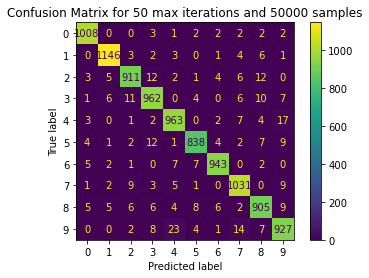

In [22]:
print("************50000**********")   
sample = np.random.randint(70000, size=50000)
data = mnist.data[sample]
target = mnist.target[sample]

#Spliting dataset
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state=0, test_size = 0.20)

#Artificial Neural Network classifier
mlp= MLPClassifier(hidden_layer_sizes=(50), activation='logistic', 
                  solver='adam', #solver
                  alpha=0.01,# L2 penalty (regularization term) parameter
                  batch_size='auto', #Size of minibatches for stochastic optimizers.
                  max_iter=i, #Maximum number of iterations
                  tol=1e-4, #When the loss or score is not improving by at least tol for n_iter_no_change
                  verbose=False, # To Print progress messages during learning step
                  warm_start=False, #When set to True, reuse the solution of the previous call to fit as
                  early_stopping=True, #Whether to use early stopping to terminate training when
                  validation_fraction=0.1, #The proportion of training data to set aside as validation se
                  n_iter_no_change=50) #Maximum number of epochs to not meet tol improvement.)
#had to change tolerance for convergence of the algorithm. 

#training
start_time = datetime.now()
mlp.fit(x_train, y_train)
end_time = datetime.now()

#training time
print("Training Time: ", (end_time-start_time))

#Score calculation
score_train = mlp.score(x_train, y_train)
score_test = mlp.score(x_test, y_test)
print("Score for training: {0:.3f}".format(score_train))
print("Score for test: {0:.3f}".format(score_test))

#Prediction
y_predict = mlp.predict(x_test)
#y_predict_train = mlp.predict(x_train)

#precision score
precision = precision_score(y_test, y_predict, average='micro')
print("Precision score: {0:.3f}".format(precision))

#accuracy score
accuracy = accuracy_score(y_test,y_predict)
print("Accuracy score: {0:.3f}\n".format(accuracy))

#confusion matrix
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_);
disp.plot();
plt.title("Confusion Matrix for 50 max iterations and 50000 samples");

Le temps d'éxécution est beaucoup plus lent pour 50 000 échantillons avec un gain de 0.01 en précision pour le dataset de test.

**Changement du nombre de neurones pour 20 000 échantillons**

******Model with 20 neurons ********
Training Time:  0:00:14.191733
Score for training: 0.943
Score for test: 0.921
Precision score: 0.921
Accuracy score: 0.921



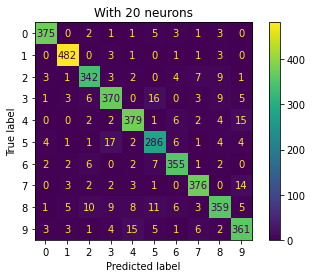

******Model with 100 neurons ********
Training Time:  0:00:30.808313
Score for training: 0.975
Score for test: 0.946
Precision score: 0.946
Accuracy score: 0.946



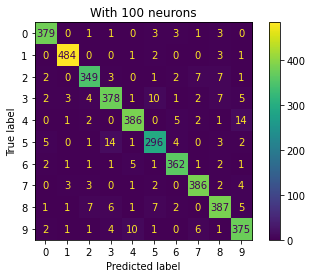

******Model with 300 neurons ********
Training Time:  0:02:13.817273
Score for training: 0.981
Score for test: 0.959
Precision score: 0.959
Accuracy score: 0.959



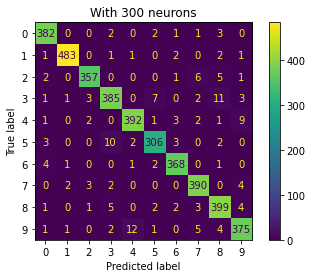

******Model with 500 neurons ********
Training Time:  0:04:23.732376
Score for training: 0.988
Score for test: 0.961
Precision score: 0.961
Accuracy score: 0.961



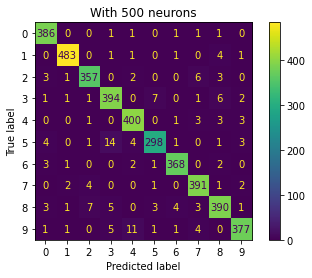

In [23]:
sample = np.random.randint(70000, size=20000)
data = mnist.data[sample]
target = mnist.target[sample]

#Spliting dataset
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state=0, test_size = 0.20)

for i in (20, 100, 300, 500):
    print("******Model with {0} neurons ********".format(i))
    #Artificial Neural Network classifier
    mlp= MLPClassifier(hidden_layer_sizes=(i), activation='logistic', 
                      solver='adam', #solver
                      alpha=0.01,# L2 penalty (regularization term) parameter
                      batch_size='auto', #Size of minibatches for stochastic optimizers.
                      max_iter=300, #Maximum number of iterations
                      tol=1e-4, #When the loss or score is not improving by at least tol for n_iter_no_change
                      verbose=False, # To Print progress messages during learning step
                      warm_start=False, #When set to True, reuse the solution of the previous call to fit as
                      early_stopping=True, #Whether to use early stopping to terminate training when
                      validation_fraction=0.1, #The proportion of training data to set aside as validation se
                      n_iter_no_change=50) #Maximum number of epochs to not meet tol improvement.)
    #had to change tolerance for convergence of the algorithm. 
    
    #training
    start_time = datetime.now()
    mlp.fit(x_train, y_train)
    end_time = datetime.now()
    
    #training time
    print("Training Time: ", (end_time-start_time))
    
    #Score calculation
    score_train = mlp.score(x_train, y_train)
    score_test = mlp.score(x_test, y_test)
    print("Score for training: {0:.3f}".format(score_train))
    print("Score for test: {0:.3f}".format(score_test))
    
    #Prediction
    y_predict = mlp.predict(x_test)
    y_predict_train = mlp.predict(x_train)
    
    #precision score
    precision = precision_score(y_test, y_predict, average='micro')
    print("Precision score: {0:.3f}".format(precision))
    
    #accuracy score
    accuracy = accuracy_score(y_test,y_predict)
    print("Accuracy score: {0:.3f}\n".format(accuracy))
    
    cm = confusion_matrix(y_test, y_predict)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
    disp.plot()
    plt.title("With {0} neurons".format(i))
    plt.show()
    plt.close()

## Exercice 2

Nous utilisons 5 000 échantillons pour entraîner le classificateur. 

Model with (65,) neurons 


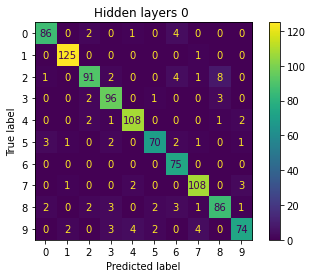

Model with (65, 91) neurons 


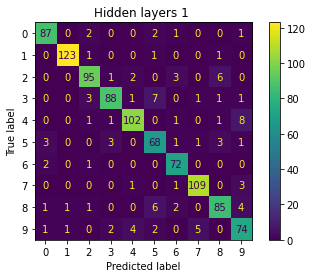

Model with (65, 91, 62) neurons 


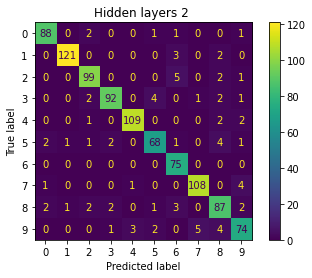

Model with (65, 91, 62, 58) neurons 


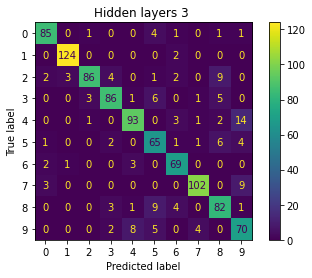

Model with (65, 91, 62, 58, 62) neurons 


C:\Users\andre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


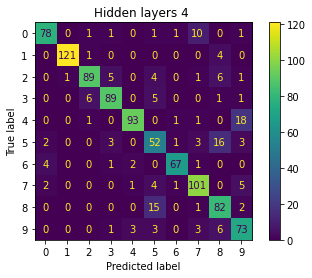

In [24]:
sample = np.random.randint(70000, size=5000)
data = mnist.data[sample]
target = mnist.target[sample]

#Spliting dataset
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state=0, test_size = 0.20)

neurons =[]
time = []
score_train = np.zeros(5)
score_test = np.zeros(5)
accuracy = np.zeros(5)
precision = np.zeros(5)

for i in range(0,5):
    random = np.random.randint(50,100)
    neurons = list(neurons)
    neurons.append(random)
    neurons = tuple(neurons)
    
    print("Model with {0} neurons ".format(neurons))
    #Artificial Neural Network classifier
    mlp= MLPClassifier(hidden_layer_sizes=(neurons), activation='logistic', 
                      solver='adam', #solver
                      alpha=0.01,# L2 penalty (regularization term) parameter
                      batch_size='auto', #Size of minibatches for stochastic optimizers.
                      max_iter=300, #Maximum number of iterations
                      tol=1e-4, #When the loss or score is not improving by at least tol for n_iter_no_change
                      verbose=False, # To Print progress messages during learning step
                      warm_start=False, #When set to True, reuse the solution of the previous call to fit as
                      early_stopping=True, #Whether to use early stopping to terminate training when
                      validation_fraction=0.1, #The proportion of training data to set aside as validation se
                      n_iter_no_change=50) #Maximum number of epochs to not meet tol improvement.)
    #had to change tolerance for convergence of the algorithm. 
    
    #training
    start_time = datetime.now()
    mlp.fit(x_train, y_train)
    end_time = datetime.now()
    
    #training time
    time.append((end_time-start_time).total_seconds())
    
    #Score calculation
    score_train[i] = mlp.score(x_train, y_train)
    score_test[i] = mlp.score(x_test, y_test)
    #print("Score for training: {0:.3f}".format(score_train))
    #print("Score for test: {0:.3f}".format(score_test))
    
    #Prediction
    y_predict = mlp.predict(x_test)
    #y_predict_train = mlp.predict(x_train)
    
    #precision score
    precision[i] = precision_score(y_test, y_predict, average='micro')
    #print("Precision score: {0:.3f}".format(precision))
    
    #accuracy score
    accuracy[i] = accuracy_score(y_test,y_predict)
    #print("Accuracy score: {0:.3f}\n".format(accuracy))
    
    #confusion matrix
    cm = confusion_matrix(y_test, y_predict)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
    disp.plot()
    plt.title("Hidden layers {0} ".format(i))
    plt.show()
    plt.close()

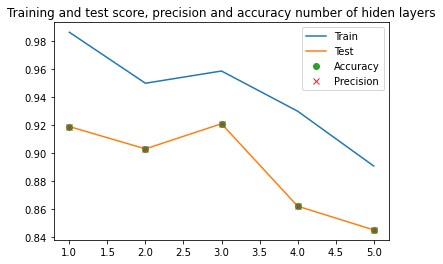

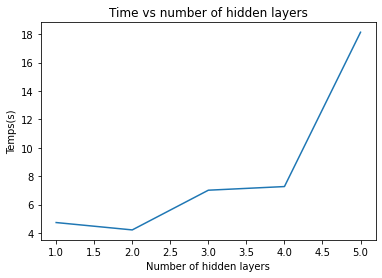

In [25]:
n = np.arange(1,6)
plt.plot(n,score_train, label="Train")
plt.plot(n, score_test, label="Test")
plt.title("Training and test score, precision and accuracy number of hiden layers")
plt.plot(n, accuracy,'o', label="Accuracy")
plt.plot(n, precision,'x', label="Precision")
plt.legend()
plt.show()
plt.close()

plt.plot(n,time)
plt.ylabel("Temps(s)")
plt.xlabel("Number of hidden layers")
plt.title("Time vs number of hidden layers")
plt.show()
plt.close()

Nous observons une meilleure précision pour une seule couche de neurones. De plus, le temps d'exécution est plus faible pour cette configuration. Nous utiliserons cette configuration

**Changement des algorithmes d'optimization**


******Model using lbfgs ********


C:\Users\andre\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training Time:  0:00:09.048007
Score for training: 0.966
Score for test: 0.904
Precision score: 0.904
Accuracy score: 0.904



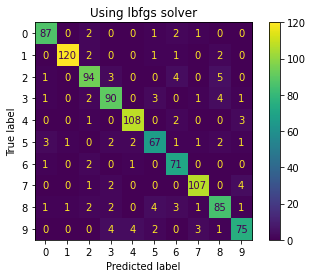

******Model using sgd ********
Training Time:  0:00:04.212222
Score for training: 0.941
Score for test: 0.874
Precision score: 0.874
Accuracy score: 0.874



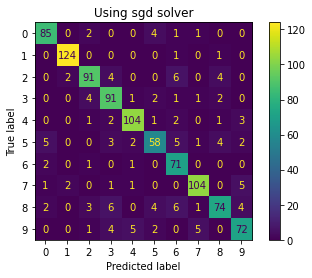

******Model using adam ********
Training Time:  0:00:04.140509
Score for training: 0.983
Score for test: 0.918
Precision score: 0.918
Accuracy score: 0.918



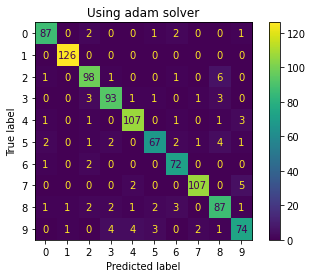

In [26]:
solver = ("lbfgs", "sgd",  "adam")

#Spliting dataset
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state=0, test_size = 0.20)

for i in solver:
    print("******Model using {0} ********".format(i))
    #Artificial Neural Network classifier
    mlp= MLPClassifier(hidden_layer_sizes=(75), activation='logistic', 
                      solver=i, #solver
                      alpha=0.01,# L2 penalty (regularization term) parameter
                      batch_size='auto', #Size of minibatches for stochastic optimizers.
                      max_iter=300, #Maximum number of iterations
                      tol=1e-4, #When the loss or score is not improving by at least tol for n_iter_no_change
                      verbose=False, # To Print progress messages during learning step
                      warm_start=False, #When set to True, reuse the solution of the previous call to fit as
                      early_stopping=True, #Whether to use early stopping to terminate training when
                      validation_fraction=0.1, #The proportion of training data to set aside as validation se
                      n_iter_no_change=50) #Maximum number of epochs to not meet tol improvement.)
    #had to change tolerance for convergence of the algorithm. 
    
    #training
    start_time = datetime.now()
    mlp.fit(x_train, y_train)
    end_time = datetime.now()
    
    #training time
    print("Training Time: ", (end_time-start_time))
    
    #Score calculation
    score_train = mlp.score(x_train, y_train)
    score_test = mlp.score(x_test, y_test)
    print("Score for training: {0:.3f}".format(score_train))
    print("Score for test: {0:.3f}".format(score_test))
    
    #Prediction
    y_predict = mlp.predict(x_test)
    y_predict_train = mlp.predict(x_train)
    
    #precision score
    precision = precision_score(y_test, y_predict, average='micro')
    print("Precision score: {0:.3f}".format(precision))
    
    #accuracy score
    accuracy = accuracy_score(y_test,y_predict)
    print("Accuracy score: {0:.3f}\n".format(accuracy))
    
    cm = confusion_matrix(y_test, y_predict)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
    disp.plot()
    plt.title("Using {0} solver".format(i))
    plt.show()
    plt.close()

Nous gardons le solver adam car il a donné la meilleure performance. 

**Changement des fonctions d'activation**


******Model using identity ********
Training Time:  0:00:03.303806
Score for training: 0.980
Score for test: 0.874
Precision score: 0.874
Accuracy score: 0.874



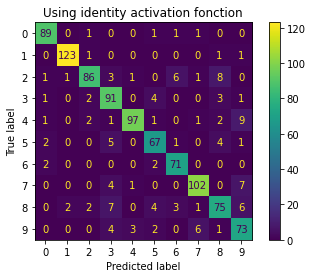

******Model using logistic ********
Training Time:  0:00:04.236651
Score for training: 0.982
Score for test: 0.909
Precision score: 0.909
Accuracy score: 0.909



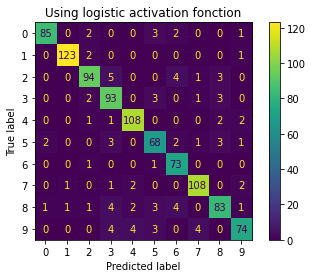

******Model using tanh ********
Training Time:  0:00:05.442617
Score for training: 0.952
Score for test: 0.901
Precision score: 0.901
Accuracy score: 0.901



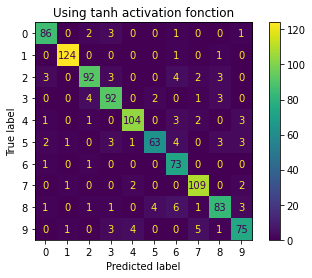

******Model using relu ********
Training Time:  0:00:02.133536
Score for training: 0.978
Score for test: 0.853
Precision score: 0.853
Accuracy score: 0.853



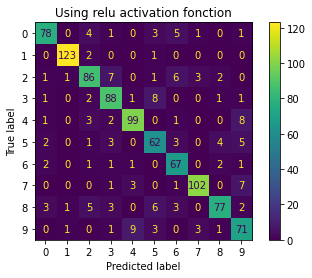

In [27]:
activ = ("identity", "logistic", "tanh", "relu")

#Spliting dataset
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state=0, test_size = 0.20)

for i in activ:
    print("******Model using {0} ********".format(i))
    #Artificial Neural Network classifier
    mlp= MLPClassifier(hidden_layer_sizes=(75), activation=i, 
                      solver="adam", #solver
                      alpha=0.01,# L2 penalty (regularization term) parameter
                      batch_size='auto', #Size of minibatches for stochastic optimizers.
                      max_iter=300, #Maximum number of iterations
                      tol=1e-4, #When the loss or score is not improving by at least tol for n_iter_no_change
                      verbose=False, # To Print progress messages during learning step
                      warm_start=False, #When set to True, reuse the solution of the previous call to fit as
                      early_stopping=True, #Whether to use early stopping to terminate training when
                      validation_fraction=0.1, #The proportion of training data to set aside as validation se
                      n_iter_no_change=50) #Maximum number of epochs to not meet tol improvement.)
    #had to change tolerance for convergence of the algorithm. 
    
    #training
    start_time = datetime.now()
    mlp.fit(x_train, y_train)
    end_time = datetime.now()
    
    #training time
    print("Training Time: ", (end_time-start_time))
    
    #Score calculation
    score_train = mlp.score(x_train, y_train)
    score_test = mlp.score(x_test, y_test)
    print("Score for training: {0:.3f}".format(score_train))
    print("Score for test: {0:.3f}".format(score_test))
    
    #Prediction
    y_predict = mlp.predict(x_test)
    y_predict_train = mlp.predict(x_train)
    
    #precision score
    precision = precision_score(y_test, y_predict, average='micro')
    print("Precision score: {0:.3f}".format(precision))
    
    #accuracy score
    accuracy = accuracy_score(y_test,y_predict)
    print("Accuracy score: {0:.3f}\n".format(accuracy))
    
    cm = confusion_matrix(y_test, y_predict)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
    disp.plot()
    plt.title("Using {0} activation fonction".format(i))
    plt.show()
    plt.close()

La fonction d'activation qui est plus perfromante est logistic. 

****** Model alpha = 1e-06 ********
Training Time:  0:00:03.302236
Score for training: 0.970
Score for test: 0.915
Precision score: 0.915
Accuracy score: 0.915



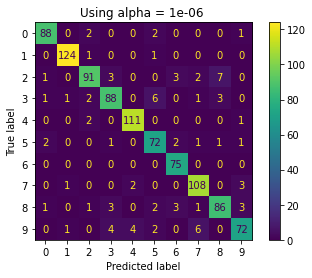

****** Model alpha = 0.01 ********
Training Time:  0:00:03.786585
Score for training: 0.976
Score for test: 0.906
Precision score: 0.906
Accuracy score: 0.906



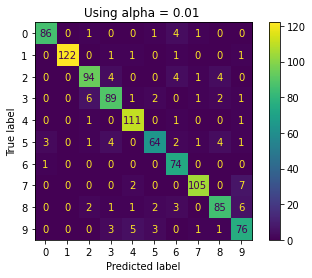

****** Model alpha = 0.1 ********
Training Time:  0:00:04.673237
Score for training: 0.987
Score for test: 0.921
Precision score: 0.921
Accuracy score: 0.921



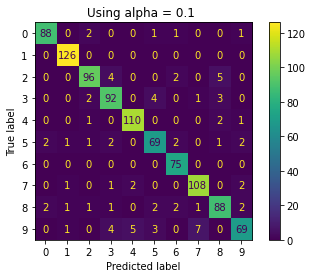

In [28]:
alpha = [10**(-6), 10**(-2), 10**(-1)]
#Spliting dataset
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state=0, test_size = 0.20)

for i in alpha:
    print("****** Model alpha = {0} ********".format(i))
    #Artificial Neural Network classifier
    mlp= MLPClassifier(hidden_layer_sizes=(75), activation="logistic", 
                      solver="adam", #solver
                      alpha=i,# L2 penalty (regularization term) parameter
                      batch_size='auto', #Size of minibatches for stochastic optimizers.
                      max_iter=300, #Maximum number of iterations
                      tol=1e-4, #When the loss or score is not improving by at least tol for n_iter_no_change
                      verbose=False, # To Print progress messages during learning step
                      warm_start=False, #When set to True, reuse the solution of the previous call to fit as
                      early_stopping=True, #Whether to use early stopping to terminate training when
                      validation_fraction=0.1, #The proportion of training data to set aside as validation se
                      n_iter_no_change=50) #Maximum number of epochs to not meet tol improvement.)
    #had to change tolerance for convergence of the algorithm. 
    
    #training
    start_time = datetime.now()
    mlp.fit(x_train, y_train)
    end_time = datetime.now()
    
    #training time
    print("Training Time: ", (end_time-start_time))
    
    #Score calculation
    score_train = mlp.score(x_train, y_train)
    score_test = mlp.score(x_test, y_test)
    print("Score for training: {0:.3f}".format(score_train))
    print("Score for test: {0:.3f}".format(score_test))
    
    #Prediction
    y_predict = mlp.predict(x_test)
    y_predict_train = mlp.predict(x_train)
    
    #precision score
    precision = precision_score(y_test, y_predict, average='micro')
    print("Precision score: {0:.3f}".format(precision))
    
    #accuracy score
    accuracy = accuracy_score(y_test,y_predict)
    print("Accuracy score: {0:.3f}\n".format(accuracy))
    
    cm = confusion_matrix(y_test, y_predict)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
    disp.plot()
    plt.title("Using alpha = {0} ".format(i))
    plt.show()
    plt.close()

Meilleur performance pour alpha = 0.02

**Opinion sur ANN**

Cette méthode même si très performante en termes de précision ne nous permet pas de savoir comment a été construit le réseau de neurones. C'est une boîte noire dont on n'arrive pas à avoir des informations. En effet, chaque fois qu'on exécute l'algorithme nous obtenons des mesures de précisions différentes qui peuvent beaucoup varier. Le temps d'exécution est aussi très élevé dès que nous avons un grand nombre de neurones (plus de 4 minutes pour 500 neurones). 

# LAB 3 : Classification with Decision Trees

## PART 1: Basic steps

Usingn an artificial dataset we will train a decision tree classifer.  

In [29]:
from sklearn import tree
from matplotlib import pyplot as plt # for a good visualization of the trees 
import numpy as np

In [30]:
#Manually constructed dataset with random generation of arrays
X = np.random.randint(0,2,(10,4)) #10 samples and 4 features
Y = np.random.randint(0,2,10)

In [31]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

## PART 2 : Visualization

We will now visualize the decision tree we just trained using the artificial dataset. 

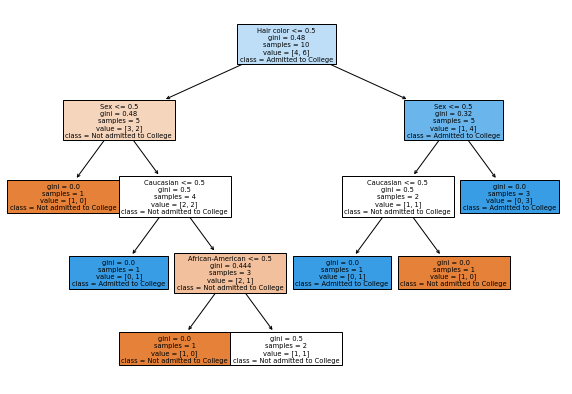

In [32]:
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                   feature_names= ("Sex","African-American" , "Caucasian", "Hair color"),
                   class_names= ("Not admitted to College", "Admitted to College" ), 
                   filled=True)

## PART 3: The compass dataset 

### What are the features?
There are 11 different features in the original dataset like the sex, ethinicity and age of the person arrested. 

### How many samples in the dataset? 
There are 6172 valid samples in the dataset.

### What are your expectations regarding the most importat features?
The most important features should have the highest impact training the classifier to predict recidivism

### Propose (informally) a way to reduce the dataset
We could drop columns that we feel will be less useful than others to train the classifier. There are other dimension reduction techniques like Principal Component Analysis. We could also randomly drop some samples from the dataset. 

### There many ways to binarize the dataset. How to you propose to do so?
To binarize the dataset we have to look at the caracteristics of the feature we want to binarize. For example, for the feature race there are many possible values which are not ordinary (we can not rank them) so we use one-hot encoding (1 or 0). On the other hand for sex we can use a normal binary encoder (0 for men and 1 for women for example). 


In [33]:
import pandas as pd
import csv

In [34]:
data = pd.read_csv('compass.csv')
data.head()

,race_African-American,race_Caucasian,gender_Female,gender_Male,age_18-20,age_21-22,age_23-25,age_26-45,age_>45,juvenile-felonies_=0,...,priors_>3__AND__age_>45,age_>45__AND__charge_degree_Felony,age_>45__AND__gender_Female,juvenile-felonies_=0__AND__age_18-20,juvenile-misdemeanors_=0__AND__age_18-20,age_18-20__AND__charge_degree_Felony,gender_Male__AND__age_18-20,age_18-20__AND__juvenile-crimes_=0,age_18-20__AND__priors_0,two_year_recid
0,1,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
from utils import load_from_csv

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")
print(train_examples)
print(train_labels)
#(features)
print(prediction)

[[1 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
[1 0 0 ... 1 0 1]
two_year_recid


### What are these 4 variables?
- train_examples : Samples for training the classifier
- train_labels : The labels of the samples that will be used to train the classifier (recidivicism or not)
- features : All the features present in the dataset
- prediction : prediction by COMPAS on recidivism

### What do these different parameters of the DecisionTreeClassifier represent?

- splitter : The strategy used to choose the split at each node
- max_depth : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- min_samples_leaf : The minimum number of samples required to split an internal node.

### Finding the best parameters for the decision classifier

#### Decision Classifier changing the maximum depth of the tree

In each iteration we will change the maximum depth of the trea and calculate the accuracy score to find the value that maximizes this metric. 

In [36]:
n = [1, 5, 10, 20, 50, 100]
score_test = np.zeros(len(n))
score_train = np.zeros(len(n))
from sklearn.model_selection import train_test_split

for i in range(0, len(n)):
    x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels, random_state=0, test_size = 0.20)
    clf = tree.DecisionTreeClassifier(splitter = "best", max_depth = n[i])
    clf = clf.fit(x_train, y_train)
    score_test[i] = clf.score(x_test, y_test) 
    score_train[i] = clf.score(x_train, y_train) 

[0.63560929 0.68018018 0.69653864 0.6981982  0.6981982  0.6981982 ]


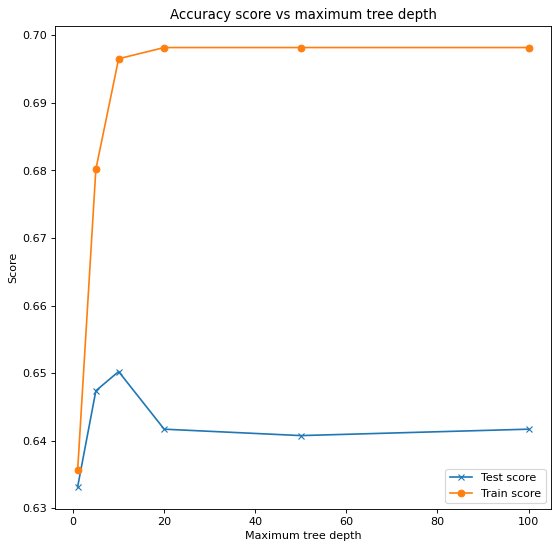

In [37]:
from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)
plt.plot(n,score_test, marker='x', label="Test score")
plt.plot(n, score_train, marker='o', label="Train score" )
plt.legend()
plt.title("Accuracy score vs maximum tree depth")
plt.ylabel("Score")
plt.xlabel("Maximum tree depth")
print(score_train)

Changing the tree depth does not have much influence on the accuracy score. We obtain the best score for a maximum tree depth of **10**. We observe that overfitting occurs for a maximum tree depth superior to 20. 

#### Decision classifier changing min_sample_split

Same approach but changing the minimum sample split. 

In [38]:
n = [1, 20,30, 50, 70, 100, 200, 300, 500]
score_test = np.zeros(len(n))
score_train = np.zeros(len(n))
from sklearn.model_selection import train_test_split


for i in range(0, len(n)):
    x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels, random_state=0, test_size = 0.20)
    clf = tree.DecisionTreeClassifier(splitter = "best", min_samples_leaf = n[i])
    clf = clf.fit(x_train, y_train)
    score_test[i] = clf.score(x_test, y_test) 
    score_train[i] = clf.score(x_train, y_train)

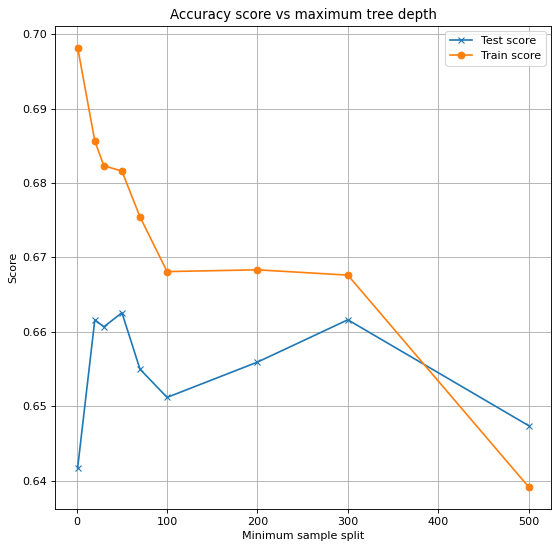

In [39]:
figure(figsize=(8, 8), dpi=80)
plt.plot(n,score_test, marker='x', label="Test score")
plt.plot(n, score_train, marker='o', label="Train score" )
plt.title("Accuracy score vs maximum tree depth")
plt.ylabel("Score")
plt.xlabel("Minimum sample split")
plt.legend()
plt.grid()

The test score is the best for a minimum samples of **50**. In the next part we set both criteria to their best value.

#### Changing the splitter method

Using the optimal configuration we now see how different the accuracy score is depending on which strategy we use to split the nodes. 

In [40]:
x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels, random_state=0, test_size = 0.20)
clf = tree.DecisionTreeClassifier(splitter = "best", max_depth = 10, min_samples_leaf = 50)
clf = clf.fit(x_train, y_train)
print("******** Splitter : Best ************")
print("Test score with Strategie best {:.4f}".format(clf.score(x_test, y_test)))
print("Train score with Strategie best {:.4f}".format(clf.score(x_train, y_train)))

x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels, random_state=0, test_size = 0.20)
clf = tree.DecisionTreeClassifier(splitter = "random", max_depth = n[i])
clf = clf.fit(x_train, y_train)
print("\n")
print("******** Splitter : Random ************")
print("Test score with Strategie random {:.4f}".format(clf.score(x_test, y_test)))
print("Train score with Strategie random {:.4f}".format(clf.score(x_train, y_train)))

******** Splitter : Best ************
Test score with Strategie best 0.6626
Train score with Strategie best 0.6816


******** Splitter : Random ************
Test score with Strategie random 0.6398
Train score with Strategie random 0.6982


We observe a better accuracy score using "best" strategy for splitter. 

### Analysis of the final model

Using the previous results we will build a classifier with the following caracterisitics :
- splitter : Strategy best
- max_depth : 10
- min_samples_leaf : 50

We will then analyse, evaluate and visualize the trained model

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels, random_state=0, test_size = 0.20)

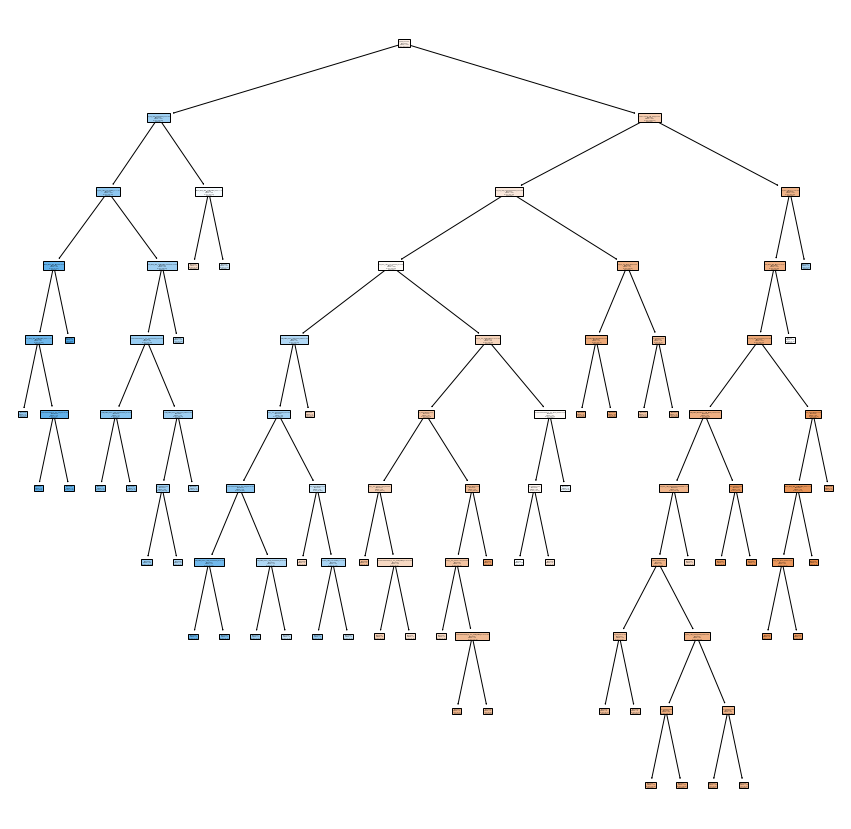

In [42]:
# Visual representation of the decision tree

clf = tree.DecisionTreeClassifier(splitter = "best", max_depth = 10, min_samples_leaf = 50)
clf = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf, 
                   feature_names= features,
                   class_names= ("Free", "Jail" ), 
                   filled=True)

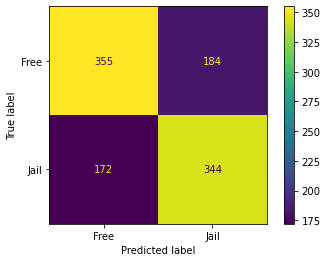

In [43]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=("Free", "Jail"))
disp.plot()

#### Analisis of the confusion matrix
Thinking about the application of this classifier, we would want to make sure that false positives (sending innocent people to change) should be as low as possible. Therefore it is one of the most important parameters. 

### Assessing the fairness of the algorithm for a particular ethnic group

There are a number of fairness criteria that will help us evaluate the fairness of the model. The most well known are Independance, Sufficiency and Separation. Here, we will only study independence 

The fairness criterion independence is satisfied if A(the sensitive feature, here ethnic group) and R(the result of the prediction) are statistically independent ($A⊥R$). This just means that every ethnic group should have an identical positive prediction rate. In this case that means that they all get sent to jail at the same rate, independtly of their true label.

We will now compute the positive prediction rate for the different ethnic groups and check if there are equal and hence that independence is satisfied. This translates into:

$\large\frac{TP_{A=a}+FP_{A=a}}{\# \ Group\ a}\overset{!}{=}\frac{TP_{A=b}+FP_{A=b}}{\# \ Group\ b}$

In [45]:
#Preparing the data for analysis and training
X = data.drop(columns=["two_year_recid"])
Y = data["two_year_recid"]
#data split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size = 0.20)
#model training
clf = tree.DecisionTreeClassifier(splitter = "best", max_depth = 10, min_samples_leaf = 50)
clf = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

group_Black = x_test['race_African-American']==1
group_white = x_test["race_Caucasian"]==1

#compute confusion matrix for the subset according to race
cmb = confusion_matrix(y_test[group_Black], y_predict[group_Black])
cmw = confusion_matrix(y_test[group_white], y_predict[group_white])

#We get the values of the confusion matrix
tn_b, fp_b, fn_b, tp_b = cmb.ravel()
tn_w, fp_w, fn_w, tp_w = cmw.ravel()

#Calculate positive prediction rate
independence_w = (tp_w + fp_w) / (tn_w + fp_w + fn_w + tp_w)
independence_b = (tp_b + fp_b) / (tn_b + fp_b + fn_b + tp_b)

print('Independence Caucasian: {:.3f} %'.format(independence_w*100))
print('Independence African-American: {:.3f} %'.format(independence_b*100))

Independence Caucasian: 31.674 %
Independence African-American: 63.295 %


We see that the positive prediction rate for African Americans double that of Caucasians. That means that African Americans are twice as likely to get sent to jail, regardless of their true label. Hence, we can say that the classifier used here does not meet the necessary fairness requirements and should be revised. One way to make it fairer would be to use the same classifier but change the decision threshold which is by default set at 0,5. 

In [46]:
#prediting probabilities
y_proba = clf.predict_proba(x_test)
#Keeping onnly the second column with the probability it corresponds to a class 1. 
y_proba = y_proba[:,1]

y_proba_w = [1 if val >= 0.5 else 0 for val in y_proba[group_white]]
y_proba_b = [1 if val >= 0.68 else 0 for val in y_proba[group_Black]]

#compute confusion matrix for the subset according to race
cmb = confusion_matrix(y_test[group_Black], y_proba_b)
cmw = confusion_matrix(y_test[group_white], y_proba_w)

#We get the values of the confusion matrix
tn_b, fp_b, fn_b, tp_b = cmb.ravel()
tn_w, fp_w, fn_w, tp_w = cmw.ravel()

#Calculate positive prediction rate
independence_w = (tp_w + fp_w) / (tn_w + fp_w + fn_w + tp_w)
independence_b = (tp_b + fp_b) / (tn_b + fp_b + fn_b + tp_b)

print('Independence Caucasian: {:.3f} %'.format(independence_w*100))
print('Independence African-American: {:.3f} %'.format(independence_b*100))

Independence Caucasian: 31.674 %
Independence African-American: 34.584 %


After some trial and error we manage to get similar independence rates by changing the thresholds. 